In [1]:
########### A4 ######################
from mnist import MNIST
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg
from tqdm import tqdm
import seaborn as sns

In [2]:
def load_dataset():
  mndata = MNIST('../../hw1/python-mnist/data/')
  X_train, labels_train = map(np.array, mndata.load_training())
  X_test, labels_test = map(np.array, mndata.load_testing())
  X_train = X_train/255.0
  X_test = X_test/255.0
  return X_test,labels_test,X_train,labels_train

In [3]:
def classifyPoints(centroids, PointList,k ):
    '''
    k is the number of centers 
    centroids is a m-by-k array containing the centers 
    PointList is a m-by-n array containing n observations
    
    return class_map: a dictionary maps index of the observations to the corresponding class
    '''
    
    class_map = {class_num : [] for class_num in range(k)}  # map of {class: index of the vector}
    m,n = PointList.shape
    for i in range(n):
        group  = np.argmin(np.sum(np.square(centroids -PointList[:,i].reshape(m,1)),axis= 0)) # argmin returns the minimum position
        class_map[group].append(i) 
    return class_map

def re_center(PointList, class_map, k):
    '''
    d is the dimension the observations lives in 
    k is the number of centers 
    PointList is a m-by-n array containing n observations
    class_map: a dictionary maps index of the observations to the corresponding class
    
    return new_centroid: d-by-k matrix, for k centers 
    '''
    d,n = PointList.shape
    new_centroids = []
    for class_id in range(k):
        inds = class_map[class_id]
        X_temp = np.copy(PointList[:,inds]) 
        mean_pos = np.mean(X_temp,axis = 1 )# mean accross the columns
        #center_pos = np.argmin(np.sum(np.square( X_temp - mean_pos ), axis= 0) )
        #new_centroids.append(X_temp[:,center_pos])
        new_centroids.append(mean_pos)
    res = np.array(new_centroids)
    #print(res.shape)
    return np.array(new_centroids).T

def objective_function(class_map, X,centroids,k,d):
    obj_val = 0; 
    for i in range(k):
        obj_val += np.sum(np.square(X[:,class_map[i]]- centroids[:,i].reshape(d,1)))
    return obj_val

In [4]:
X_test,labels_test,X_train,labels_train = load_dataset()

In [117]:
np.where(labels_train==4)

(array([    2,     9,    20, ..., 59943, 59951, 59975]),)

In [8]:
X = X_train.T
k =10
d,n = X.shape # dimension of each observation
#center_inds = [1,3,5,7,9,0,13,15,17,4]
center_inds = np.random.choice(n,10,replace=False)
centroids = X[:,center_inds]
old_centroids = np.zeros((d,k))
itr = 0
objective_values=[]
while(np.max(np.abs(old_centroids- centroids)) > 1e-2):
    if itr % 10 == 0 : print(itr)
    class_map =  classifyPoints(centroids, X,k)
    old_centroids = centroids
    objective_values.append(objective_function(class_map, X,centroids,k,d))
    centroids = re_center(X,class_map, k)
    itr += 1
    if(itr > 30000): break


0
10
20
30


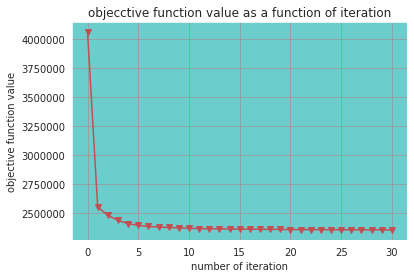

In [9]:
sns.set_style("darkgrid", {"axes.facecolor": "#6dcdcd","grid.color": ".6", })
plt.plot(range(itr),objective_values, 'r-v')
plt.title('objecctive function value as a function of iteration')
plt.xlabel('number of iteration')
plt.ylabel('objective function value')
sns.set()
#plt.savefig('A4b_obj')

[9 1 7 7 0 0 9 1 4 7]
31
(784, 10)


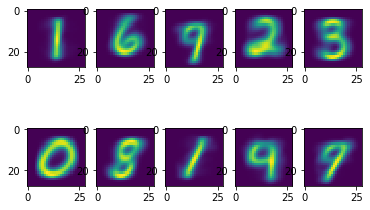

In [11]:
print(labels_train[center_inds])
labels_train[class_map[9]][1:100]
print(itr)
print(centroids.shape)
sns.reset_orig()
f, axarr = plt.subplots(2,5)
axarr[0,0].imshow(centroids[:,0].reshape(28,28))
axarr[0,1].imshow(centroids[:,1].reshape(28,28))
axarr[0,2].imshow(centroids[:,2].reshape(28,28))
axarr[0,3].imshow(centroids[:,3].reshape(28,28))
axarr[0,4].imshow(centroids[:,4].reshape(28,28))

axarr[1,0].imshow(centroids[:,5].reshape(28,28))
axarr[1,1].imshow(centroids[:,6].reshape(28,28))
axarr[1,2].imshow(centroids[:,7].reshape(28,28))
axarr[1,3].imshow(centroids[:,8].reshape(28,28))
axarr[1,4].imshow(centroids[:,9].reshape(28,28))
#plt.savefig('A4b_centroid')

In [12]:
###############################################
############        A4(c)        ##############
###############################################

In [14]:
X1 = X_train.T
X2 = X_test.T
d1,n1 = X1.shape # dimension of each observation
d2,n2 = X2.shape
training_error=[]
testing_error=[]
centroids_list= []
for k in tqdm([2,4,8,16,32,64]):
    
    # training set
    #center_inds = [1,3,5,7,9,0,13,15,17,4]
    center_inds = np.random.choice(n1,k,replace=False)
    centroids = X1[:,center_inds]
    old_centroids = np.zeros((d1,k))
    itr = 0
    objective_values=[]
    while(np.max(np.abs(old_centroids- centroids)) > 1e-2):
        #if itr % 10 == 0 : 
            #print(np.max(np.abs(old_centroids- centroids)))
        class_map =  classifyPoints(centroids, X1,k)
        old_centroids = centroids
        centroids = re_center(X1,class_map, k)
        itr += 1
        if(itr > 30000): break
    
    # calculating training error
    training_error.append( 1/n1 * objective_function(class_map, X1,centroids,k,d1))
    # testing 
    class_map_testing  =  classifyPoints(centroids, X2,k)
    testing_error.append( 1/n2 * objective_function(class_map_testing, X2,centroids,k,d2))
    
    
    


100%|██████████| 6/6 [08:02<00:00, 80.46s/it] 


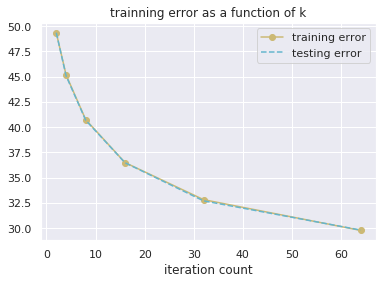

In [21]:
plt.plot([2,4,8,16,32,64],training_error, 'y-o',label='training error')  
plt.plot([2,4,8,16,32,64],testing_error, 'c--',label = 'testing error')  
plt.title('trainning error as a function of k')
plt.xlabel('iteration count')
sns.set_style("darkgrid")
plt.legend()
sns.set()
plt.savefig('A4c')